In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import difflib
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [90]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
df = pd.read_csv('/content/movies.csv')
df.sample(5)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
351,351,90000000,Drama Thriller Crime,http://thedeparted.warnerbros.com/,1422,undercover boston police friends mafia,en,The Departed,"To take down South Boston's Irish Mafia, the p...",63.429157,...,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Lies. Betrayal. Sacrifice. How far will you ta...,The Departed,7.9,4339,Leonardo DiCaprio Matt Damon Jack Nicholson Ma...,"[{'name': 'Howard Shore', 'gender': 2, 'depart...",Martin Scorsese
733,733,60000000,Drama Romance,NaN,9302,miami television career vitamin b reporter,en,Up Close & Personal,Tally Atwater has a dream: to be a prime-time ...,4.801849,...,119.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""}]",Released,"Every Day we Have, is One More Than We Deserve.",Up Close & Personal,5.9,50,Robert Redford Michelle Pfeiffer Stockard Chan...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Jon Avnet
4693,4693,0,Thriller Drama Science Fiction,NaN,289180,woman director,en,H.,H. is a modern interpretation of a classic Gre...,1.045623,...,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,H.,6.5,4,Robin Bartlett Rebecca Dayan Will Janowitz Jul...,"[{'name': 'Rania Attieh', 'gender': 0, 'depart...",Rania Attieh
1467,1467,34000000,Drama Romance,NaN,10436,upper class new york lover countess lawyer,en,The Age of Innocence,Tale of 19th century New York high society in ...,9.133747,...,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,In a world of tradition. In an age of innocenc...,The Age of Innocence,7.0,169,Daniel Day-Lewis Michelle Pfeiffer Winona Ryde...,"[{'name': 'Martin Scorsese', 'gender': 2, 'dep...",Martin Scorsese
2711,2711,0,Drama History,NaN,9045,vatican pope concentration camp holocaust schu...,fr,Amen.,"The film ""Amen."" examines the links between th...",5.930533,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Two Men Two Worlds One Cause,Amen.,7.1,75,Ulrich Tukur Mathieu Kassovitz Ulrich M\u00fch...,"[{'name': 'Costa-Gavras', 'gender': 0, 'depart...",Costa-Gavras


In [92]:
df.columns

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

# getting data we need

In [93]:
data = df[['id','genres','keywords','overview','cast','director','title','vote_average','vote_count']].copy()

In [94]:
data.isna().sum()

,0
id,0
genres,28
keywords,412
overview,3
cast,43
director,30
title,0
vote_average,0
vote_count,0


# filling and combining

In [95]:
cols = ['genres','keywords','overview','cast','director']
for i in cols:
    data[i] = data[i].fillna('')

In [96]:
data['combine_content'] = data['genres'] + ' ' + data['keywords'] + ' ' + data['overview'] + data['cast'] + data['director']

In [97]:
data['combine_content'].iloc[45]

'Action Drama Horror Science Fiction Thriller dystopia apocalypse zombie nuclear weapons multiple perspectives Life for former United Nations investigator Gerry Lane and his family seems content. Suddenly, the world is plagued by a mysterious infection turning whole human populations into rampaging mindless zombies. After barely escaping the chaos, Lane is persuaded to go on a mission to investigate this disease. What follows is a perilous trek around the world where Lane must brave horrific dangers and long odds to find answers before human civilization falls.Brad Pitt Mireille Enos Abigail Hargrove Sterling Jerins James Badge DaleMarc Forster'

# preprocessing combined content for world colud

In [98]:
def preprocessing(text):
    # removing numbes and special charaters
    cleaned_text =  re.sub(r"[^a-zA-Z]"," ",text)
    # tokenizing
    tokens = nltk.word_tokenize(cleaned_text)
    # removing stopwords
    stop_words = set(stopwords.words('english'))
    filtered_token = [token.lower() for token in tokens if token.lower() not in stop_words and token]
    # joining
    processed_text = ' '.join(filtered_token)
    # return processed_text
    return processed_text
data['combine_content'] = data['combine_content'].apply(preprocessing)

# world colud

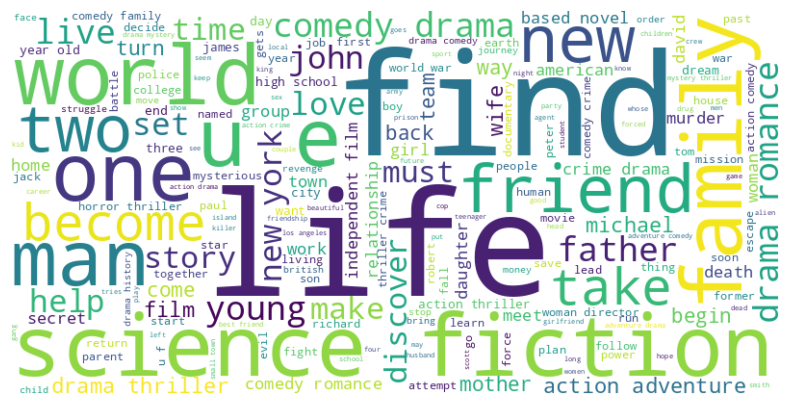

In [103]:
text = ' '.join(data['combine_content'].astype(str).tolist())
wordcloud = WordCloud(width=800,height=400,background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# vectorizing

In [104]:
data.shape

(4803, 10)

In [105]:
vectorizer = TfidfVectorizer()
tfid_matrix = vectorizer.fit_transform(data['combine_content'])

In [106]:
tfid_matrix.shape

(4803, 33066)

# calculating similarity score

In [108]:
similarity_score = cosine_similarity(tfid_matrix)

In [110]:
similarity_score.shape

(4803, 4803)

# calculating imbd score

In [112]:
C = data['vote_average'].mean()
m = data['vote_count'].quantile(0.9)
def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m))*R + (m/(v+m))*C
data['scoring'] = data.apply(weighted_rating,axis=1)

In [113]:
data['scoring']

,scoring
0,7.050669
1,6.665696
2,6.239396
3,7.346721
4,6.096368
...,...
4798,6.150380
4799,6.091650
4800,6.095125
4801,6.090684


# movie recomender system

In [152]:
def recomend(title,n_tops=6):
    title = title.lower()
    matches = difflib.get_close_matches(title,data['title'].str.lower(),n=3)
    if len(matches) != 0:
        idx = data[data['title'].str.lower()==matches[0]].index
    else:
        return 'no such movie'
    sim_score = list(enumerate(similarity_score[idx[0]]))
    sim_score = sorted(sim_score,key=lambda x: x[1],reverse=True)
    movie_idx = sim_score[1:n_tops+1]
    movie_idx = [x[0] for x in movie_idx]
    movies = data.iloc[movie_idx]
    return movies[['title','scoring']]

recomend('ironman')

,title,scoring
79,Iron Man 2,6.492535
31,Iron Man 3,6.677751
7,Avengers: Age of Ultron,7.041968
16,The Avengers,7.223399
511,X-Men,6.580761
4401,The Helix... Loaded,6.090767
